# 9.6 Lab: Support Vector Machines
We use the e1071 library in R to demonstrate the support vector classifier
and the SVM. Another option is the LiblineaR library, which is useful for
very large linear problems.

## 9.6.1 Support Vector Classifier
\begin{equation} 
\max\limits_{\beta_0, \beta_1, \dots, \beta_p} M ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~     (9.9)  \\
subject~to ~ \sum_{j=1}^p \beta_j^2 = 1 , ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ (9.10) \\
y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip})  \ge M \forall i = 1, \dots, n.   (9.11)
\end{equation}

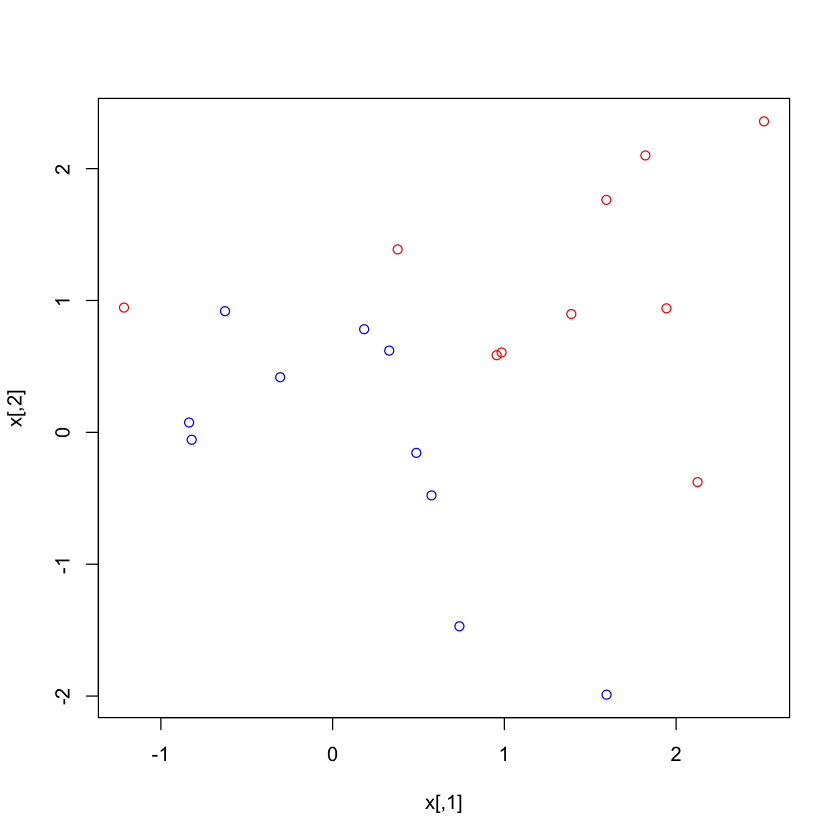

In [1]:
set.seed(1)
x = matrix(rnorm(20 * 2), ncol = 2)
y = c(rep(-1, 10), rep(1, 10))
x[y==1, ] = x[y==1, ]+1
plot(x, col = (3-y))


In [3]:
dat = data.frame(x = x, y = as.factor(y))
library(e1071)
svmfit = svm(y ~ . , data = dat, kearnel = "linear", cost = 10, scale = F)


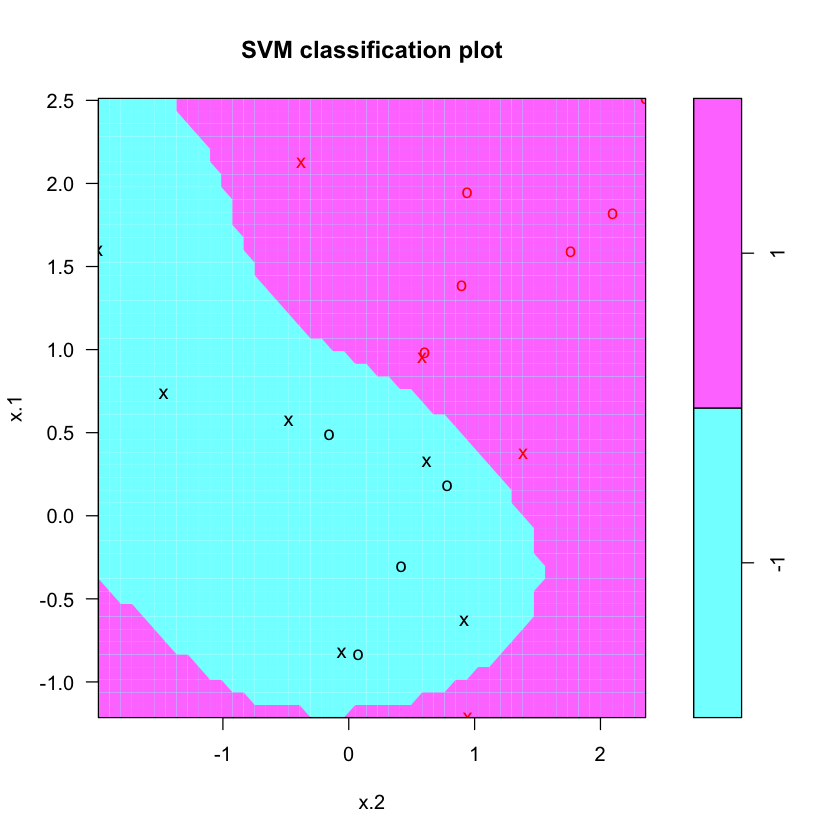

In [4]:
plot(svmfit, dat)


In [5]:
svmfit$index


[1]  1  4  5  6  8  9 13 14 15 16

In [6]:
summary(svmfit)



Call:
svm(formula = y ~ ., data = dat, kearnel = "linear", cost = 10, scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  10

 ( 6 4 )


Number of Classes:  2 

Levels: 
 -1 1




[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

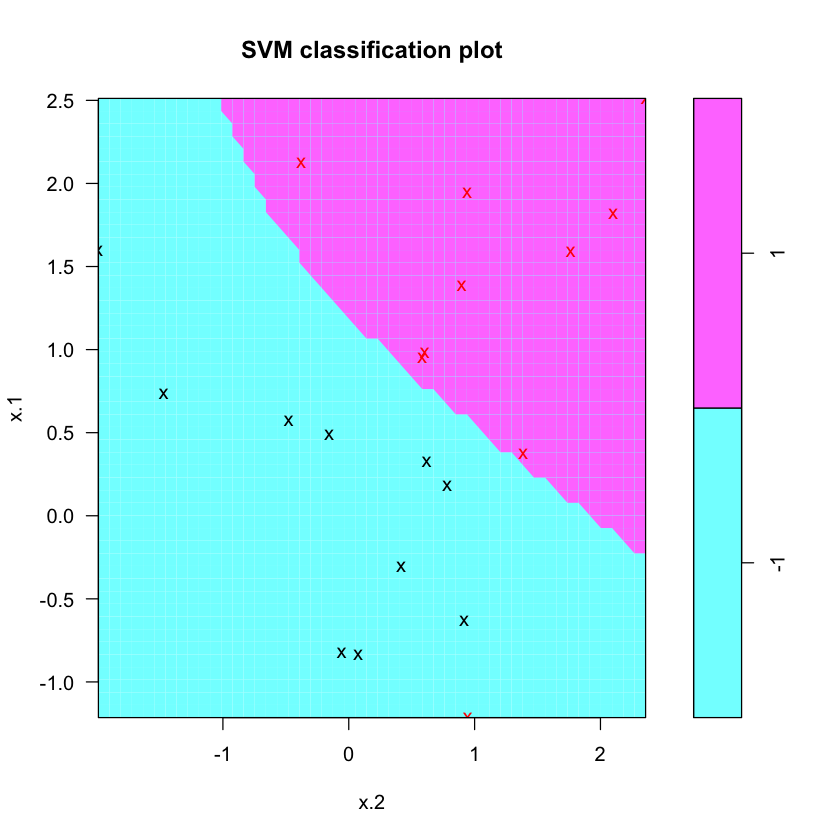

In [7]:
svmfit = svm(y ~ . , data = dat, kearnel = "linear", cost = 0.1, scale = F)
plot(svmfit, dat)
svmfit$index


In [9]:
set.seed(1)
tune.out = tune(svm, y ~ . , data = dat, kearnel = "linear",  
               ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100)))


In [10]:
summary(tune.out)



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.65  0.4743416
2 1e-02  0.65  0.4743416
3 1e-01  0.65  0.4743416
4 1e+00  0.15  0.2415229
5 5e+00  0.10  0.2108185
6 1e+01  0.10  0.2108185
7 1e+02  0.10  0.2108185


In [12]:
bestmod = tune.out$best.model
summary(bestmod)



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kearnel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  5 
      gamma:  0.5 

Number of Support Vectors:  9

 ( 5 4 )


Number of Classes:  2 

Levels: 
 -1 1




In [13]:
xtest = matrix(rnorm(20 * 2), ncol = 2)
ytest = sample(c(1, -1), 20, rep = T)
xtest[ytest==1, ] = xtest[ytest==1, ]+1
testdat = data.frame(x = xtest, y = as.factor(ytest))


In [14]:
ypred = predict(bestmod, testdat)
table(predict = ypred, truth = testdat$y)


       truth
predict -1  1
     -1  5  0
     1   4 11

In [15]:
svmfit = svm(y ~ . , data = dat, kearnel = "linear", cost = 0.1, scale = F)
ypred = predict(svmfit, testdat)
table(predict = ypred, truth = testdat$y)


       truth
predict -1 1
     -1  7 4
     1   2 7

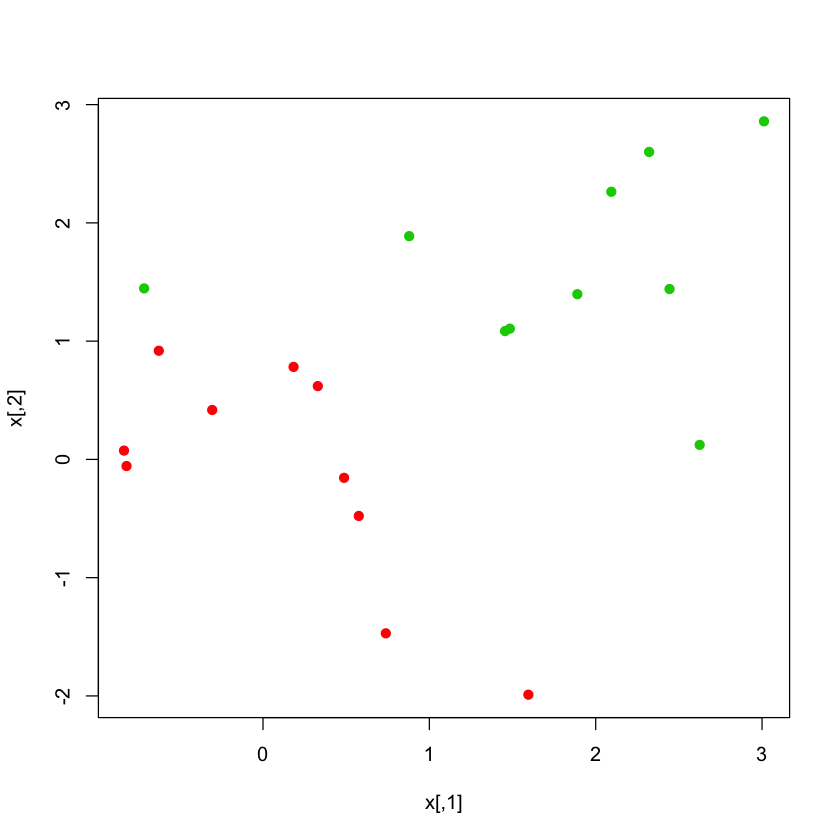

In [16]:
x[y==1, ] = x[y==1, ]+0.5
plot(x, col = (y+5)/2, pch = 19)


In [17]:
dat = data.frame(x = x, y = as.factor(y))
svmfit = svm(y ~ . , data = dat, kearnel = "linear", cost = 1e5, scale = F)
summary(svmfit)



Call:
svm(formula = y ~ ., data = dat, kearnel = "linear", cost = 1e+05, 
    scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  9

 ( 4 5 )


Number of Classes:  2 

Levels: 
 -1 1




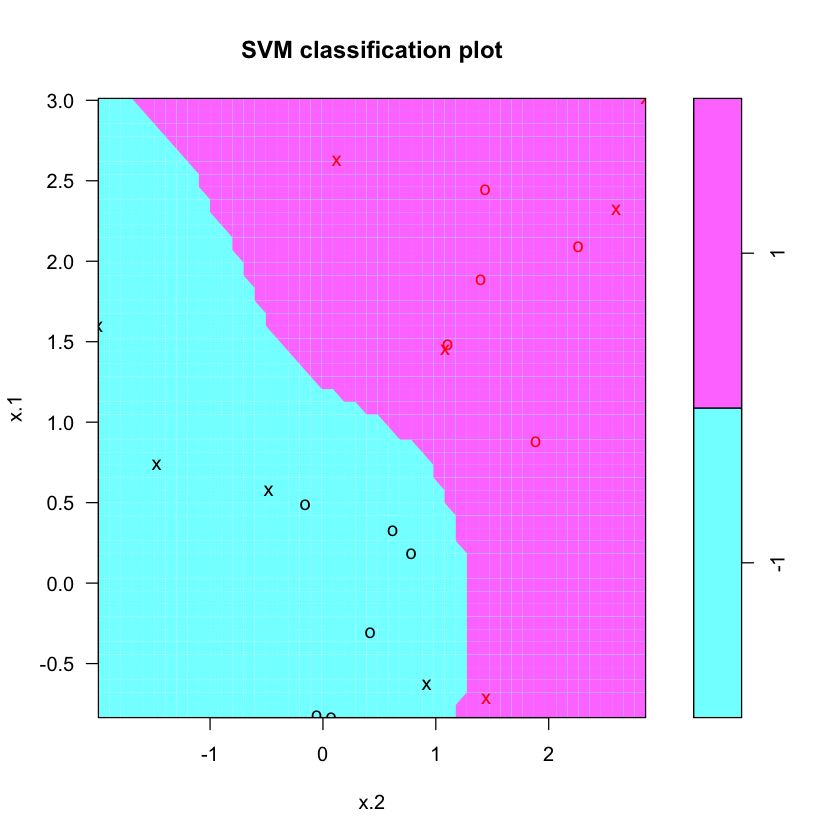

In [18]:
plot(svmfit, dat)



Call:
svm(formula = y ~ ., data = dat, kearnel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  10

 ( 5 5 )


Number of Classes:  2 

Levels: 
 -1 1




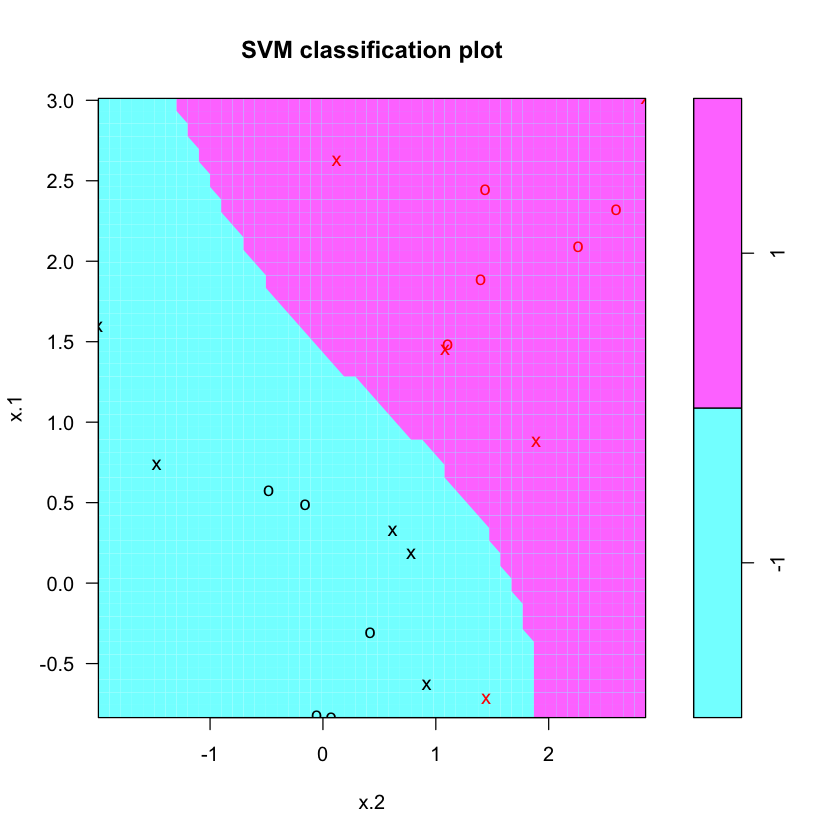

In [19]:
svmfit = svm(y ~ . , data = dat, kearnel = "linear", cost = 1)
summary(svmfit)
plot(svmfit, dat)


9.6.2 Support Vector Machines

In [20]:
set.seed(1)
x = matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] = x[1:100, ]+2
x[101:150, ] = x[101:150, ]-2
y = c(rep(1, 150), rep(2, 50))
dat = data.frame(x = x, y = as.factor(y))


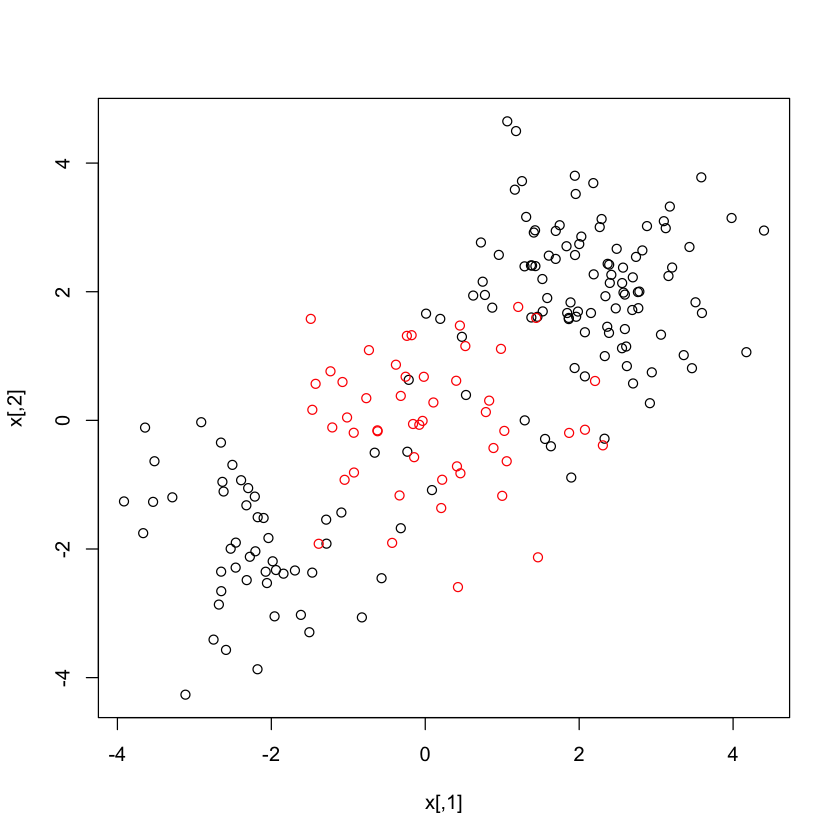

In [22]:
plot(x, col = y)


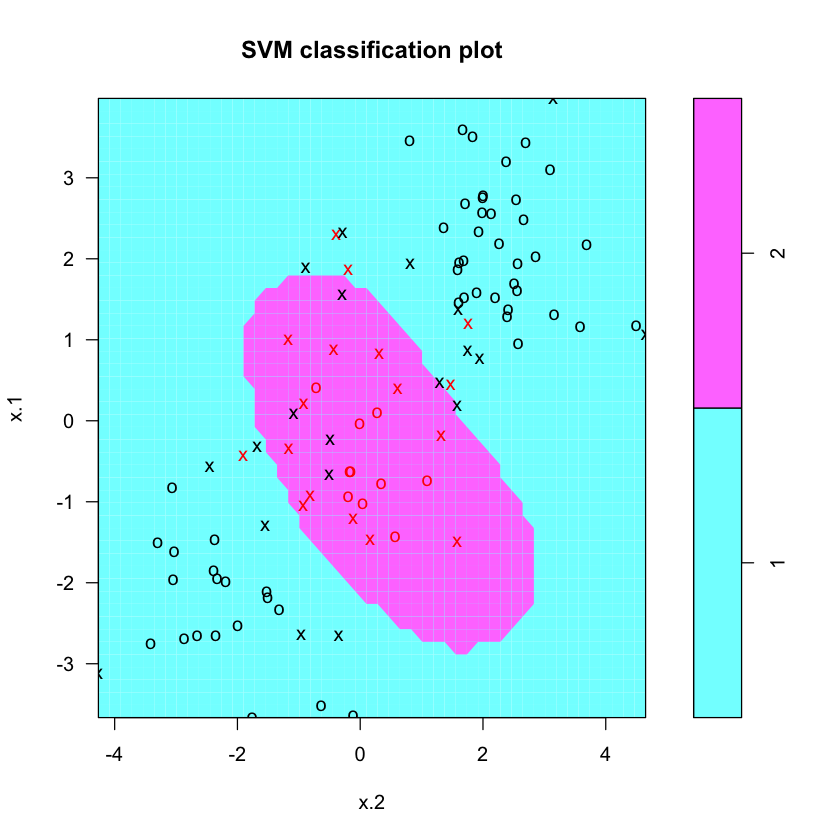

In [23]:
train = sample(200, 100)
svmfit = svm(y ~ . , data = dat[train, ], kearnel = "redial", gamma = 1, cost = 1)
plot(svmfit, dat[train, ])


In [24]:
summary(svmfit)



Call:
svm(formula = y ~ ., data = dat[train, ], kearnel = "redial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2





Call:
svm(formula = y ~ ., data = dat[train, ], kearnel = "redial", gamma = 1, 
    cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 
      gamma:  1 

Number of Support Vectors:  26

 ( 12 14 )


Number of Classes:  2 

Levels: 
 1 2




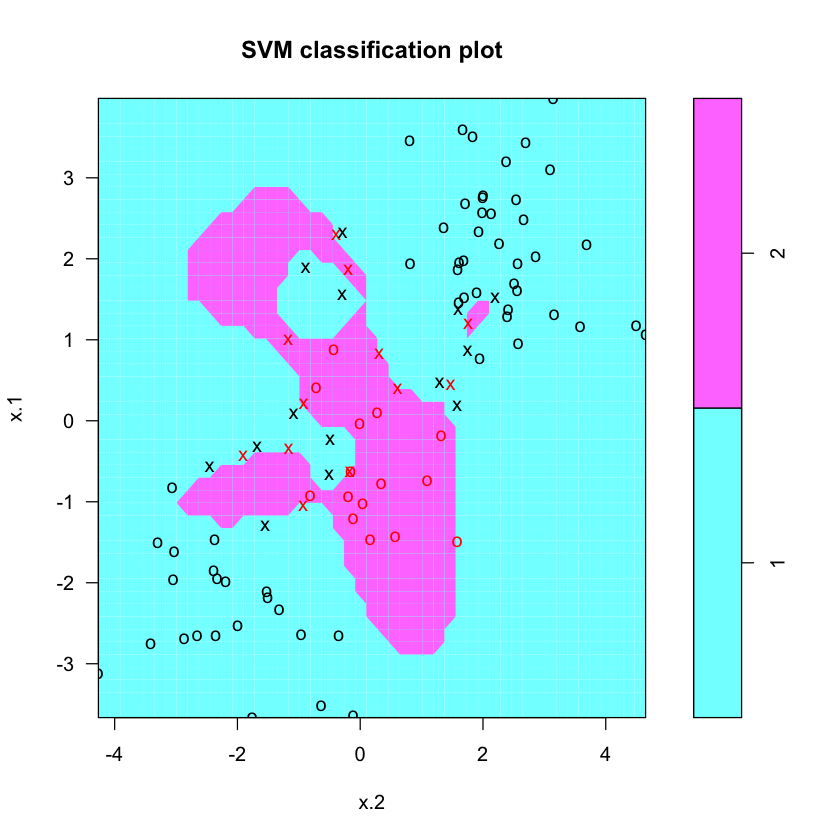

In [25]:
svmfit = svm(y ~ . , data = dat[train, ], kearnel = "redial", gamma = 1, cost = 1e5)
plot(svmfit, dat[train, ])


In [27]:
set.seed(1)
tune.out = tune(svm, y ~ . , data = dat[train, ], kearnel = "redial", 
               ranges = list(cost = c(0.1, 1, 10, 100, 1000),
               gamma = c(0.5, 1, 2, 3, 4)))
summary(tune.out)



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.11595018
2  1e+00   0.5  0.13 0.08232726
3  1e+01   0.5  0.15 0.07071068
4  1e+02   0.5  0.17 0.08232726
5  1e+03   0.5  0.21 0.09944289
6  1e-01   1.0  0.25 0.13540064
7  1e+00   1.0  0.13 0.08232726
8  1e+01   1.0  0.16 0.06992059
9  1e+02   1.0  0.20 0.09428090
10 1e+03   1.0  0.20 0.08164966
11 1e-01   2.0  0.25 0.12692955
12 1e+00   2.0  0.12 0.09189366
13 1e+01   2.0  0.17 0.09486833
14 1e+02   2.0  0.19 0.09944289
15 1e+03   2.0  0.20 0.09428090
16 1e-01   3.0  0.27 0.11595018
17 1e+00   3.0  0.13 0.09486833
18 1e+01   3.0  0.18 0.10327956
19 1e+02   3.0  0.21 0.08755950
20 1e+03   3.0  0.22 0.10327956
21 1e-01   4.0  0.27 0.11595018
22 1e+00   4.0  0.15 0.10801234
23 1e+01   4.0  0.18 0.11352924
24 1e+02   4.0  0.21 0.08755950
25 1e+03   4.0  0.24 0

In [28]:
table(true=dat[-train,"y"], pred=predict(tune.out$best.model, newdata=dat[-train ,]))


    pred
true  1  2
   1 74  3
   2  7 16

9.6.3 ROC Curves

In [30]:
library(ROCR)
rocplot = function(pred, truth, ...){
  predob = prediction(pred, truth)
  perf = performance(predob, "tpr", "fpr")
  plot(perf, ...)
}


Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [40]:
svmfit.opt = svm(y ~ . , data = dat[train, ], kearnel = "redial", gamma = 2, cost = 1, decision.values = T)
fitted = attributes(predict(svmfit.opt,dat[train, ], decision.values = T))$decision.values


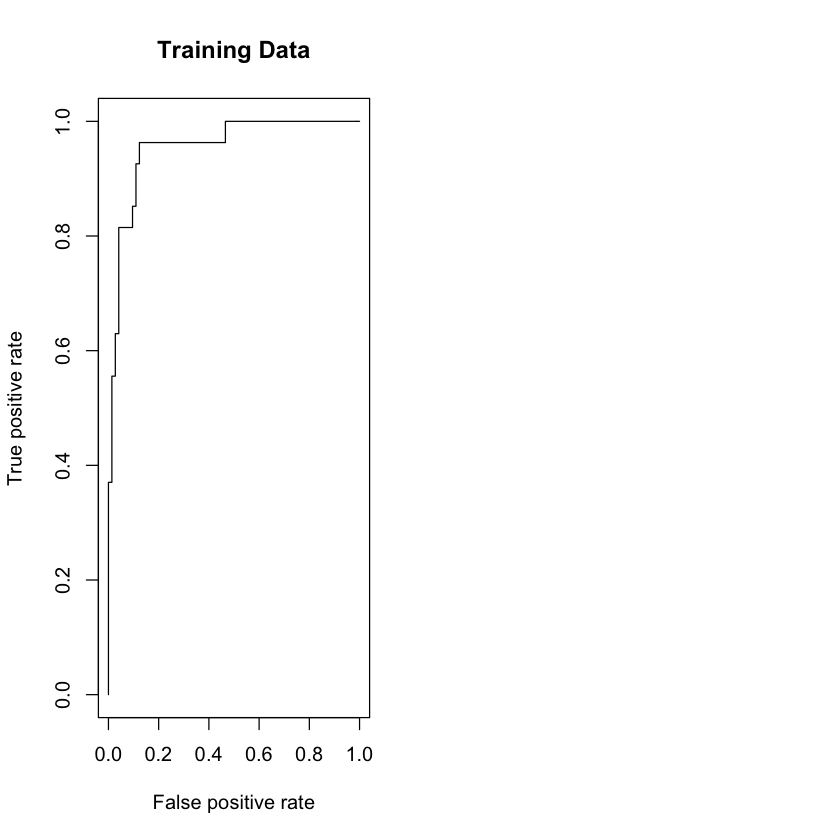

In [41]:
par(mfrow = c(1, 2))
rocplot(fitted, dat[train, "y"], main = "Training Data")


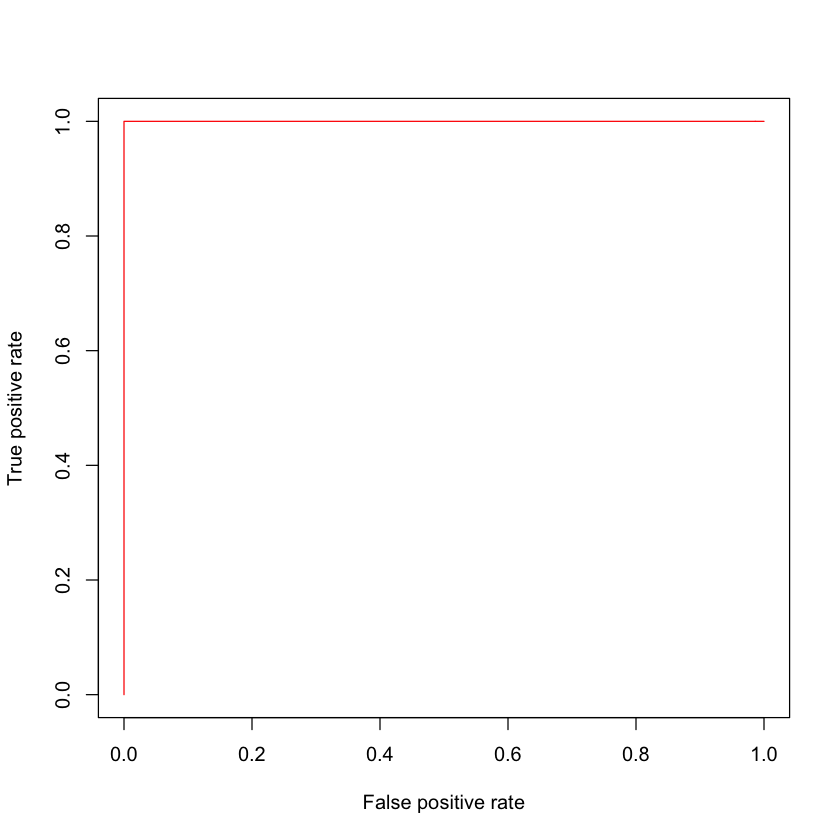

In [42]:
svmfit.flex = svm(y ~ . , data = dat[train, ], kernel = "radial", gamma = 50, cost = 1, decision.values = T)
fitted = attributes(predict(svmfit.flex, dat[train, ], decision.values = T))$decision.values
rocplot(fitted, dat[train, "y"], add = F, col = "red")


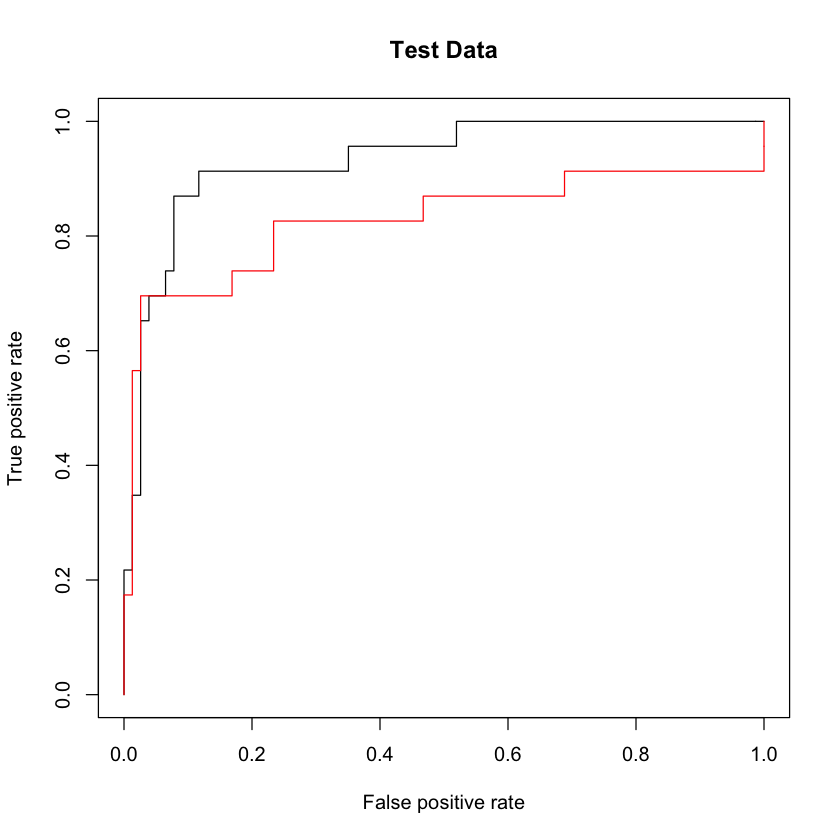

In [44]:
fitted = attributes(predict(svmfit.opt, dat[-train, ], decision.values = T))$decision.values
rocplot(fitted,dat[-train, "y"], main = "Test Data")
fitted = attributes(predict(svmfit.flex, dat[-train, ], decision.values = T))$decision.values
rocplot(fitted, dat[-train, "y"], add = T, col = "red")


9.6.4 SVM with Mulple Classes

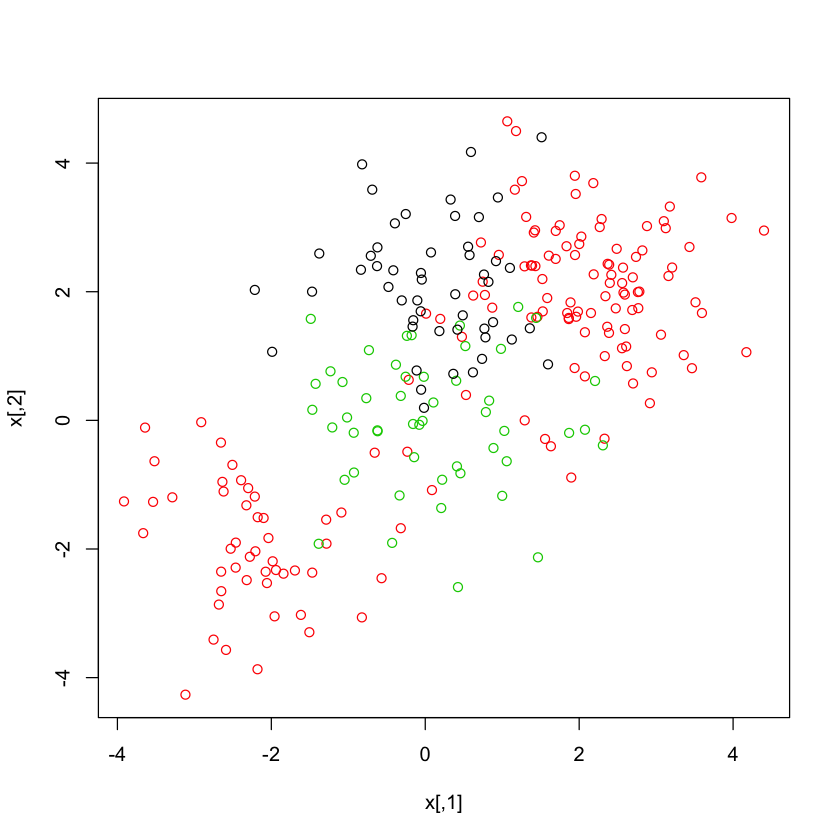

In [45]:
set.seed(1)
x = rbind(x, matrix(rnorm(50 * 2), ncol = 2))
y = c(y, rep(0, 50))
x[y==0, 2] = x[y==0, 2]+2
dat = data.frame(x = x, y = as.factor(y))
par(mfrow = c(1, 1))
plot(x, col = (y + 1))


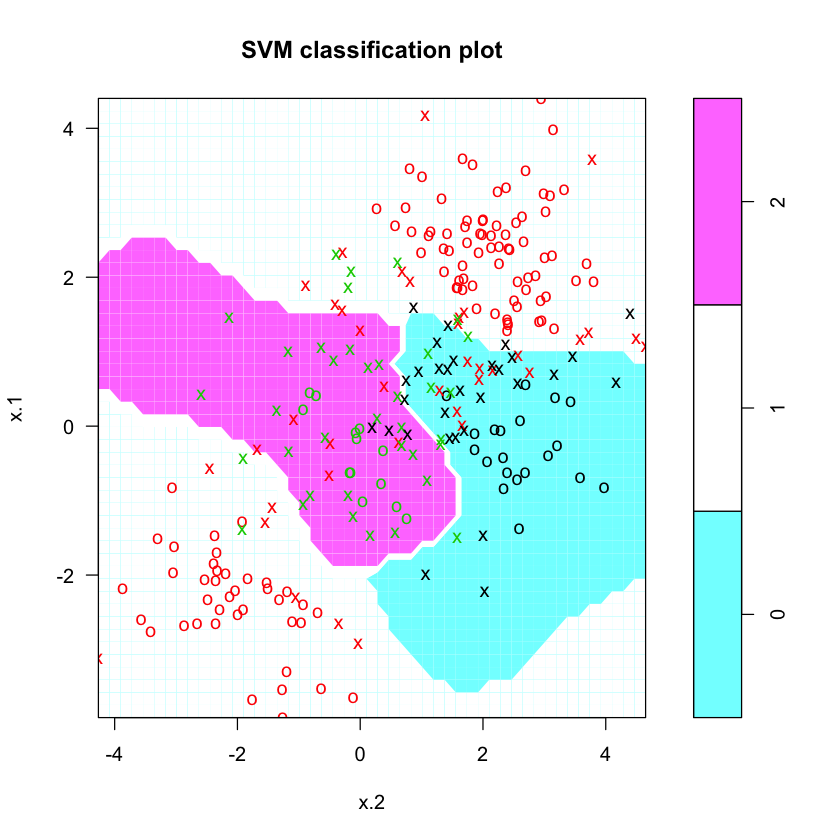

In [47]:
svmfit = svm(y ~ . , data = dat, kernel = "radial", cost = 10, gamma = 1)
plot(svmfit, dat)

9.6.5 Application to Gene Expression Data

In [48]:
library(ISLR)
names(Khan)
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)


[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20

In [49]:
table(Khan$ytrain)
table(Khan$ytest)



 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 

In [51]:
dat = data.frame(x = Khan$xtrain, y = as.factor(Khan$ytrain))
out = svm(y ~ . , data = dat, kernel = "linear", cost = 10)
summary(out)



Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [52]:
table(out$fitted, dat$y)


   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [53]:
dat.te = data.frame(x = Khan$xtest, y = as.factor(Khan$ytest))
pred.te = predict(out, newdata = dat.te)
table(pred.te, dat.te$y)


       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5